In [36]:
import glob
import cv2
import os
from matplotlib import pyplot as plt
#print(glob.glob('*.png'))
png_files = ['1_7-2=.png']#glob.glob('*.png')

In [15]:
img_file = cv2.imread(png_files[0],cv2.IMREAD_GRAYSCALE)
img_file.shape

(40, 110)

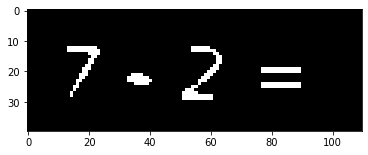

In [16]:
ret, thresh = cv2.threshold(img_file, 0, 255, cv2.THRESH_OTSU)
thresh = cv2.convertScaleAbs(thresh)
plt.imshow(thresh,cmap='gray')
plt.show()

In [26]:
"""
for y in range(thresh.shape[0]):
    for x in range(thresh.shape[1]):
        if thresh[y][x] == 255:
            print(x,y)
"""

'\nfor y in range(thresh.shape[0]):\n    for x in range(thresh.shape[1]):\n        if thresh[y][x] == 255:\n            print(x,y)\n'

Start =  14  End =  24
13 , 40
Start row =  13  End =  29


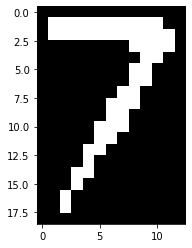

ROI_num =  0
Start =  34  End =  41
10 , 40
Start row =  22  End =  25


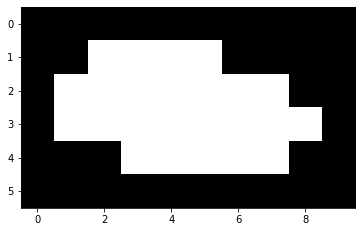

ROI_num =  1
Start =  52  End =  64
15 , 40
Start row =  13  End =  30


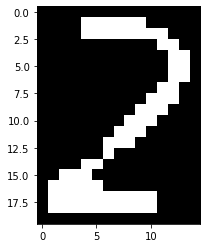

ROI_num =  2
Start =  78  End =  90
15 , 40
Start row =  20  End =  26


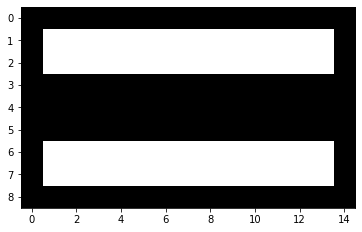

ROI_num =  3


In [40]:
k = 0
ROI_number = 0
fg_col_intensity = 255
for y in range(thresh.shape[1]):
    dummy = 0
    #print(y)
    for x in range(thresh.shape[0]):
        #print(thresh[x][y],end=" ")
        if thresh[x][y] == fg_col_intensity:
            # if character is found
            dummy = 1
    if dummy ==1:
        if k ==1:
            sart_col = y
        k += 1
    if dummy == 0 and k >2:
        end_col = y
        k1 = 0
        # find contours within that region
        print("Start = ",sart_col," End = ",end_col)
        extract_im = thresh[:,sart_col-2:end_col+1].copy()
        print(extract_im.shape[1],",",extract_im.shape[0])
        for x1 in range(extract_im.shape[0]):
            dummy1 = 0
            for y1 in range(extract_im.shape[1]):
                if extract_im[x1][y1] == fg_col_intensity:
                    #if char is found
                    dummy1 = 1
            if dummy1 == 1:
                if k1 == 1:
                    start_row = x1
                k1 += 1
            if dummy1 == 0 and k1>2:
                end_row = x1
                print("Start row = ",start_row," End = ",end_row)
                cv2.imwrite('ROI_{}.png'.format(ROI_number), extract_im[start_row-2:end_row+1,:])
                plt.imshow(extract_im[start_row-2:end_row+1,:],cmap='gray')
                plt.show()
                break
        k=0
        print("ROI_num = ",ROI_number)
        ROI_number += 1

In [32]:
ROIs = glob.glob('ROI_*.png')
ROIs.sort()
ROIs

['ROI_0.png', 'ROI_1.png', 'ROI_2.png', 'ROI_3.png']

In [38]:
name = '7-2='
list_n = list(name)
list_n

['7', '-', '2', '=']

In [41]:
count_ROI = 0
if len(ROIs) == 4:
    for item in ROIs:
        rn = str(list_n[count_ROI])+".png"
        os.rename(item,rn)
        count_ROI += 1